## NetworkX

###Import some stuff!

In [1]:
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

csvname = 'test.csv'

### Let's pull in a sample CSV file. 
####This contains a matrix of 0's and 1's corresponding to actor to actor connections via movies. This was created from the Actor/Movie list using the following syntax:

df_freqs = pd.crosstab(df_movies_slice['ActorName'], [df_movies_slice['MovieName']])

coocc = df_freqs.dot(df_freqs.T)

np.fill_diagonal(coocc.values, 1)

coocc[coocc > 1] = 1

In [2]:
coocc = pd.DataFrame.from_csv(csvname)

### Convert pandas dataframe to numpy matrix

In [3]:
adjacency = coocc.as_matrix(columns=None)
print adjacency

[[1 1 0 ..., 0 0 1]
 [1 1 0 ..., 0 0 1]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 1 0]
 [1 1 0 ..., 0 0 1]]


### This function reads the top row of the CSV file to get the actors' names

In [17]:
def get_labels(csvfile):
    with open(csvfile) as f:
        reader = csv.reader(f)
        # get the first line in csv
        labels = reader.next()
    # return just the letters from pos 1 on
    return labels[1:]

### This function creates a dictionary of actor names to use later in our graph. 

In [18]:
def make_label_dict(labels):
    l = {}
    for i, label in enumerate(labels):
        l[i] = label
    return l
label_dict = make_label_dict(get_labels('test.csv'))
print label_dict

{0: 'Alan Alda', 1: 'Alec Baldwin', 2: 'Amy Adams', 3: 'Angela Bassett', 4: 'Anne Bancroft', 5: 'Antonio Banderas', 6: 'Ashley Bell', 7: 'Aziz Ansari', 8: 'Ben Affleck', 9: 'Ben Barnes', 10: 'Casey Affleck', 11: 'Christian Bale', 12: 'Christina Applegate', 13: 'Dianna Agron', 14: 'Drew Barrymore', 15: 'Elizabeth Banks', 16: 'Eric Bana', 17: 'Gemma Arterton', 18: 'Gillian Anderson', 19: 'Jamie Bell', 20: 'Jason Bateman', 21: 'Javier Bardem', 22: 'Jay Baruchel', 23: 'Jennifer Aniston', 24: 'Jessica Alba', 25: 'Joan Allen', 26: 'Julie Andrews', 27: 'Justin Bartha', 28: 'Kate Beckinsale', 29: 'Kathy Bates', 30: 'Kevin Bacon', 31: 'Kim Basinger', 32: 'Kristen Bell', 33: 'Lake Bell', 34: 'Maria Bello', 35: 'Penn Badgley', 36: 'Sean Bean', 37: 'Tim Allen', 38: 'Tom Arnold', 39: 'Woody Allen'}


###This function calculates the nodes, edges and path lengths for our graph:

In [50]:
def calculate_graph(adjacency_matrix, mylabels):
#     ,graph_layout='shell',
#                node_size=1600, node_color='blue', node_alpha=0.3,
#                node_text_size=12,
#                edge_color='blue', edge_alpha=0.3, edge_tickness=1,
#                edge_text_pos=0.3,
#                text_font='sans-serif'):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    avg_connect_dist = []
    count = 0
    for node in gr.nodes_iter():
        length=nx.single_source_dijkstra_path_length(gr,node)
        avg_connect_dist.append(np.mean(length.values()))
    actor_name = mylabels.values()
    return avg_connect_dist, actor_name, gr

### Call the calculate graph function
#### Returns the graph, an actor name list and their average connection distances

In [51]:
avg_connect_dist, actor_name, gr = calculate_graph(adjacency, make_label_dict(get_labels(csvname)))

In [52]:
# This just checks for node numbers of specific actors in case you want 
# to calculate something like the Bacon Number
def actor_node(name,actor_name):
    for i, j in enumerate(actor_name):
        if j == name:       
            print i, j

actor_node('Kevin Bacon',actor_name)
actor_node('Jennifer Aniston',actor_name)

30 Kevin Bacon
23 Jennifer Aniston


In [75]:
# a pandas dataframe of actors and their average connectivity for your viewing pleasure
actor_connect_dist = [actor_name,avg_connect_dist]
actor_connect_dist = zip(*actor_connect_dist)
columns = ['ActorName','AvgConnectivity']
ActorConnectDF = pd.DataFrame(actor_connect_dist,columns = columns)
print ActorConnectDF

              ActorName  AvgConnectivity
0             Alan Alda         2.250000
1          Alec Baldwin         2.055556
2             Amy Adams         2.805556
3        Angela Bassett         3.972222
4         Anne Bancroft         2.777778
5      Antonio Banderas         2.888889
6           Ashley Bell         2.638889
7           Aziz Ansari         3.111111
8           Ben Affleck         1.861111
9            Ben Barnes         0.000000
10        Casey Affleck         2.333333
11       Christian Bale         2.361111
12  Christina Applegate         2.333333
13         Dianna Agron         3.083333
14       Drew Barrymore         1.750000
15      Elizabeth Banks         2.111111
16            Eric Bana         2.500000
17       Gemma Arterton         2.805556
18     Gillian Anderson         0.000000
19           Jamie Bell         3.055556
20        Jason Bateman         2.250000
21        Javier Bardem         2.805556
22         Jay Baruchel         2.944444
23     Jennifer 

In [119]:
betweenness = nx.betweenness_centrality(gr)
between = betweenness.items()
between.sort(key=lambda x:x[1],reverse=True)
between

[(14, 0.21464227097115876),
 (8, 0.1874303657585391),
 (32, 0.17804046460274134),
 (1, 0.12000179462075153),
 (15, 0.11636299628678767),
 (29, 0.0587106374436691),
 (24, 0.05227393666903074),
 (38, 0.04588394062078272),
 (20, 0.042438242122690796),
 (23, 0.03940155770948816),
 (11, 0.03812312910907814),
 (31, 0.035729862033743905),
 (12, 0.030982246872935135),
 (34, 0.030402688083088176),
 (16, 0.026619556781500096),
 (28, 0.025150776252228977),
 (39, 0.020674098907011506),
 (27, 0.017987646631371326),
 (10, 0.017841077051603364),
 (33, 0.015155409892251996),
 (0, 0.011791479801720333),
 (36, 0.011712960903244302),
 (5, 0.01025827127279854),
 (2, 0.009490863718060669),
 (22, 0.004281001649422702),
 (26, 0.0033061392313595214),
 (7, 0.00139451192082771),
 (25, 0.0009835980483753764),
 (3, 0.0),
 (4, 0.0),
 (6, 0.0),
 (9, 0.0),
 (13, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (21, 0.0),
 (30, 0.0),
 (35, 0.0),
 (37, 0.0)]

####The Graph
#TaDaaaaaa!!!

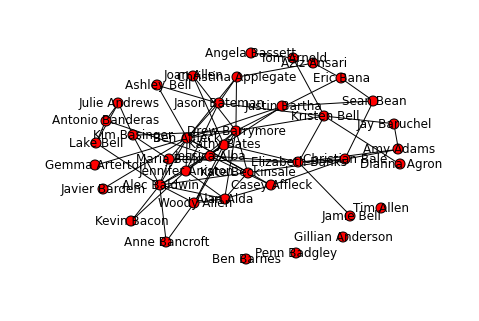

In [60]:
nx.draw(gr, node_size=100,labels=label_dict, with_labels=True,node_color='red',edge_color='black',text_font='arial')

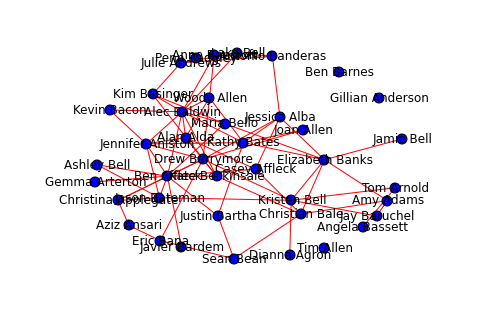

In [59]:
nx.draw(gr, node_size=100,labels=label_dict, with_labels=True,node_color='blue',edge_color='red',text_font='helvetic')

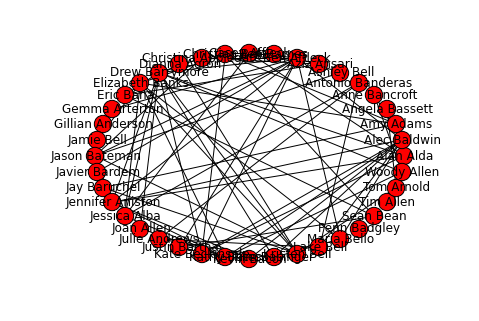

In [64]:
nx.draw_circular(gr,labels=label_dict, with_labels=True)

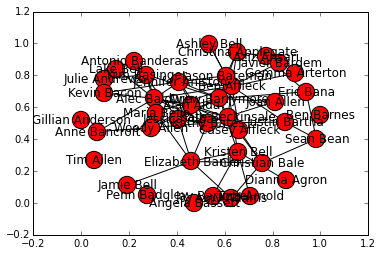

In [70]:
from networkx import draw_networkx
draw_networkx(gr, labels=label_dict,with_labels=True)

In [140]:
nx.spring_layout(gr, dim=2, k=None, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)

{0: array([ 0.51543502,  0.37890567]),
 1: array([ 0.4310908,  0.3328827]),
 2: array([ 0.54205356,  0.        ]),
 3: array([ 0.88300262,  0.81195441]),
 4: array([ 0.47896389,  0.00176765]),
 5: array([ 0.01954228,  0.335321  ]),
 6: array([ 0.69338909,  0.90530941]),
 7: array([ 0.24685962,  0.93993867]),
 8: array([ 0.43771386,  0.68244948]),
 9: array([ 0.93815276,  0.73613001]),
 10: array([ 0.36808695,  0.37860317]),
 11: array([ 0.24917805,  0.16989045]),
 12: array([ 0.45457725,  0.86377676]),
 13: array([ 0.30449618,  0.0556435 ]),
 14: array([ 0.36272365,  0.55195017]),
 15: array([ 0.49813899,  0.18819494]),
 16: array([ 0.06262223,  0.74174661]),
 17: array([ 0.57637748,  0.99823985]),
 18: array([ 0.99557733,  0.57585315]),
 19: array([ 0.76252489,  0.06819103]),
 20: array([ 0.65533601,  0.69671426]),
 21: array([ 0.17868763,  0.89261086]),
 22: array([ 0.42034711,  0.00260348]),
 23: array([ 0.60339576,  0.50453061]),
 24: array([ 0.22039738,  0.29789178]),
 25: array([

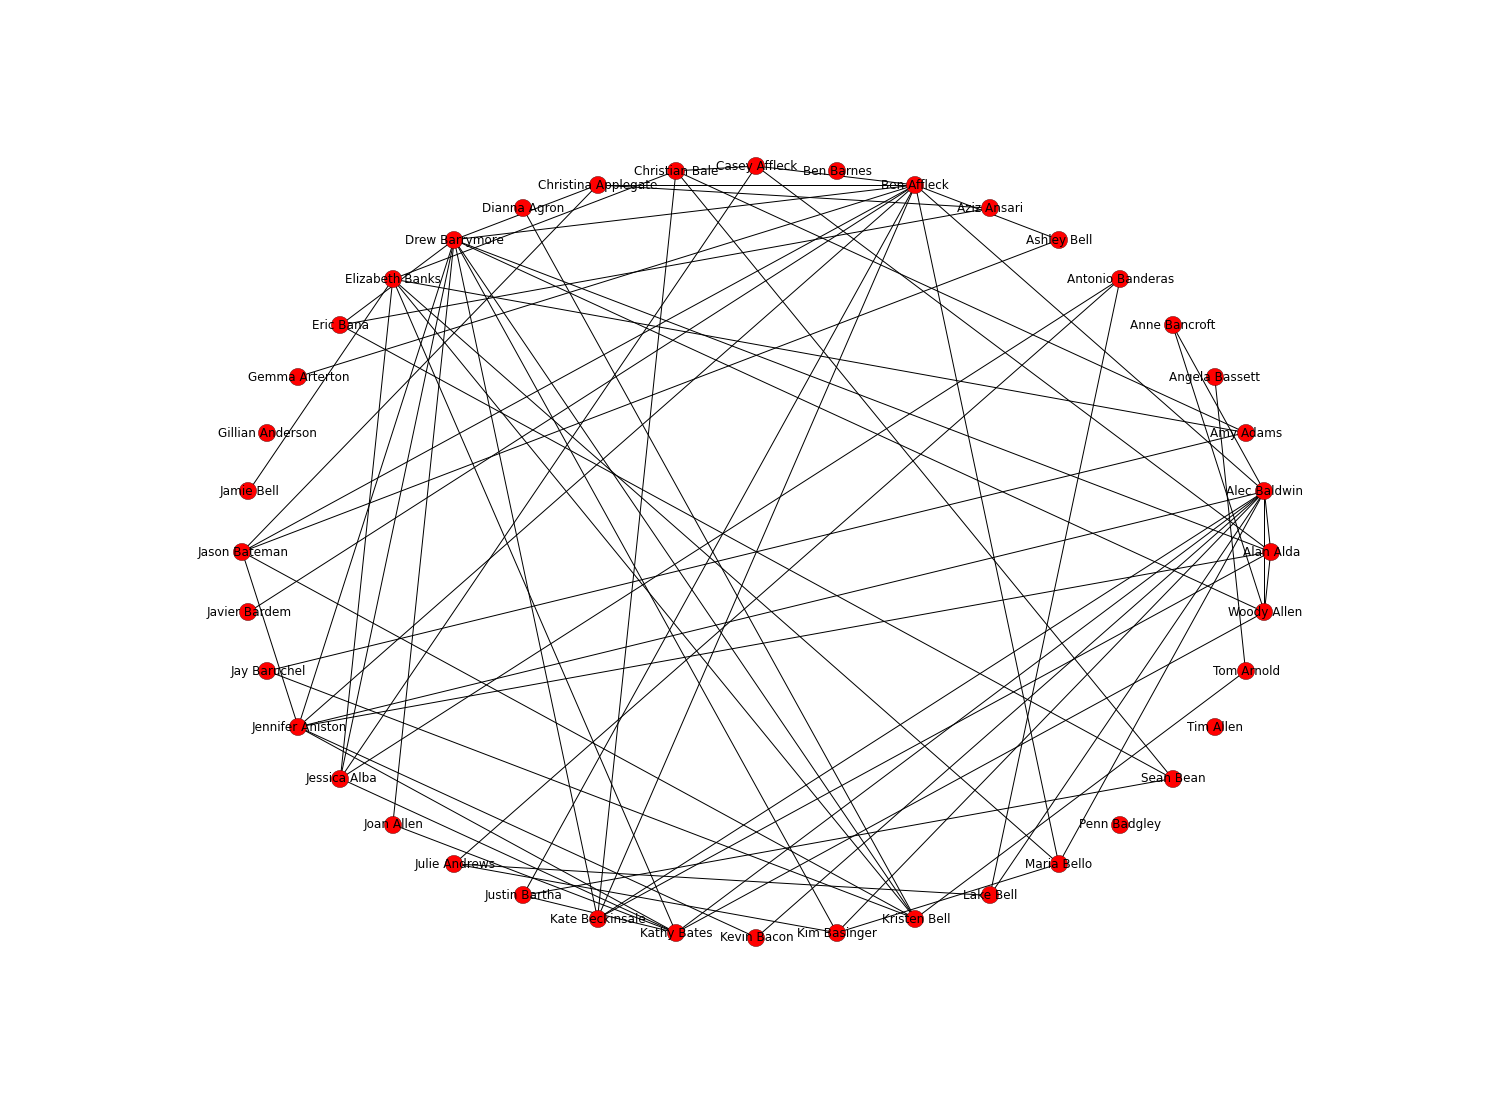

In [155]:
import seaborn as sns
nx.draw_circular(gr,labels=label_dict, with_labels=True)
sns.set_context(rc={"figure.figsize": (14, 8)})

### Here is a really good site I used to figure most of this stuff out:
http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/book_draft/Social_Networks/Networkx.html